In [41]:
#@title Importations
import csv
import random
import matplotlib.pyplot as plt
import timeit
from copy import deepcopy

In [42]:
#@title Exemple 8.1

class BandeDessinee:

    def __init__(self, titre, annee, collection, auteur, illustrateur=""):
        self._titre = titre
        self._auteur = auteur
        self._collection = collection
        self._annee = int(annee)
        if not illustrateur:
            illustrateur = auteur
        self._illustrateur = illustrateur
        # Pour exercice 8.4
        self._mode = None

    def get_titre(self) -> str:
        return self._titre

    def get_collection(self) -> str:
        return self._collection
                    
    def get_auteur(self) -> str:
        return self._auteur
    
    def set_annee(self, annee) -> None:
        self._annee = annee

    def get_annee(self) -> int:
        return self._annee
    
    def get_illustrateur(self) -> str:
        return self._illustrateur
    
    def __str__(self) -> str:
        chaine = f"{self._collection}: {self._titre}, {self._annee}"
        return chaine

    
    # Pour les exercices 8.4 et 8.5
    def __eq__(self, other) -> bool:
        egal = self._titre == other._titre
        egal = egal and self._collection == other._collection
        egal = egal and self._auteur == other._auteur
        egal = egal and self._annee == other._annee
        egal = egal and self._illustrateur == other._illustrateur
        return egal
    
    def set_mode(self, mode):
        self._mode = mode
    
    def __hash__(self) -> int:
        if self._mode == "42":
            return int(42)
        elif self._mode == "annee":
            return self._annee
        else:
            return hash(f"{self._collection}:{self._titre}") + hash(self._annee)
            


In [43]:
#@title Exercice 8.1

nom_fichier = "bd_original.csv"

les_livres = []


with open("bd_original.csv", "r", encoding="utf-8") as fichier:
    reader = csv.reader(fichier, delimiter=";")
    next(reader) # On passe la première ligne
    for line in reader:
        nouveau_livre = BandeDessinee(line[0], line[1], line[2], line[3], line[4])
        les_livres.append(nouveau_livre)

print(f"Le fichier contient {len(les_livres)} livres")


Le fichier contient 683 livres


In [44]:
#@title Exercice 8.2

def retirer_doublons_liste(elements):
    elements_trouve = []
    for element in elements:
        if element not in elements_trouve:
            elements_trouve.append(element)
    elements.clear()
    elements.extend(elements_trouve)


def retirer_doublons_set(elements):
    ensemble_elements = set(elements)
    elements.clear()                    # elements = [] ne vide pas la liste passée en paramètres, on fait pointer le paramètre sur une nouvelle liste
    for valeur in ensemble_elements:
        elements.append(valeur)


elements_1 = [4, 1, 3, 5, 4, 4, 1, 5, 8, 9]
elements_2 = elements_1.copy()

retirer_doublons_liste(elements_1)
retirer_doublons_set(elements_2)

print(f"elements_1: {elements_1}")
print(f"elements_2: {elements_2}")

elements_1: [4, 1, 3, 5, 8, 9]
elements_2: [1, 3, 4, 5, 8, 9]


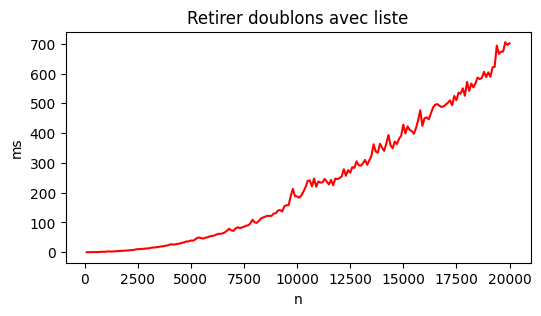

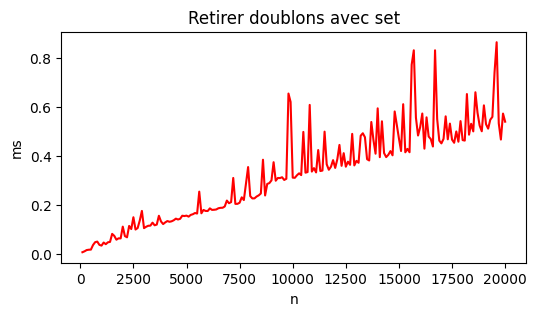

In [115]:
#@title Exercice 8.3

DEPART = 100
FIN = 20000
PAS = 100

def generer_donnees(n):
    elements = []
    nombre_distincts = n//10
    for i in range(nombre_distincts):
        elements.append(i)

    plus_grand = elements[-1]    # Le plus grand va servir à introduire des éléments qui ne sont pas dans la liste

    # On commence par se rendre à 100
    for i in range(n//10, n):
        if random.uniform(0, 1.0) <= 0.5:
            indice = random.randint(0, len(elements)-1)
            valeur = elements[indice]
        else:
            plus_grand += 1
            valeur = plus_grand
        elements.append(valeur)
    return elements

x = []
y_liste = []
y_set = []

for n in range(DEPART, FIN + PAS, PAS):
    elements = generer_donnees(n)
    x.append(n)

    temps_liste = timeit.timeit(lambda: retirer_doublons_liste(elements), number=1)
    y_liste.append(temps_liste * 1000)

    temps_set = timeit.timeit(lambda: retirer_doublons_set(elements), number=1)
    y_set.append(temps_set * 1000)


plt.figure(figsize=(6, 3))
plt.title("Retirer doublons avec liste")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_liste, "-r")
plt.show()

plt.figure(figsize=(6, 3))
plt.title("Retirer doublons avec set")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_set, "-r")
plt.show()

In [45]:
#@title Exemple 8.2

bd_1 = BandeDessinee("Objectif Lune", 1953, "Les aventures de Tintin", "Hergé")
bd_2 = BandeDessinee("Objectif Lune", 1953, "Les aventures de Tintin", "Hergé")

print(bd_1 == bd_2)

print(f"adresse de bd_1: {hex(id(bd_1))}")
print(f"adresse de bd_2: {hex(id(bd_2))}")

print(hash(bd_1))
print(hash(bd_2))

True
adresse de bd_1: 0x19caf690cd0
adresse de bd_2: 0x19caf690e50
-8410076227272509233
-8410076227272509233


In [46]:
#@title Exercice 8.4

livres_sans_doublon = []

ensemble = set(les_livres)
livres_sans_doublon = list(ensemble)

print(len(livres_sans_doublon))

256


Il y a 25856 livres


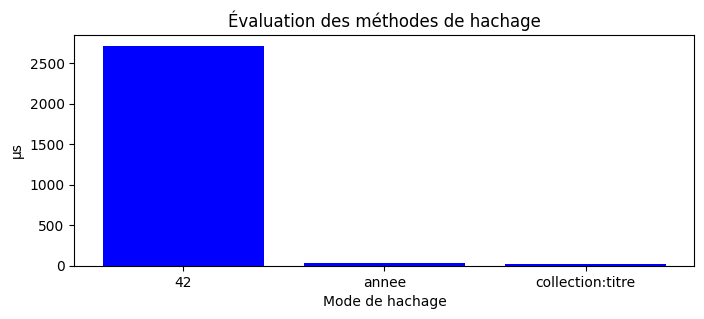

In [313]:
#@title Exercice 8.5

NB_RECHERCHES = 15000

x = ["42", "annee", "collection:titre"]


        

def determiner_recherches(liste_elements, nb_recherche):
    indices_a_chercher = []
    for i in range(nb_recherche):
        indice = random.randint(0, len(liste_elements)-1)
        indices_a_chercher.append(indice)
    return  indices_a_chercher

def faire_recherches(ensemble, elements, a_chercher):
    for indice in a_chercher:
        livre = elements[indice]
        present = livre in ensemble
        assert(present)

livres_42 = deepcopy(livres_sans_doublon)
for livre in livres_42:
    livre.set_mode("42")
livres_annee = deepcopy(livres_sans_doublon)
for livre in livres_annee:
    livre.set_mode("annee")
livres_titres = deepcopy(livres_sans_doublon)

set_42 = set(livres_42)
set_annee = set(livres_annee)
set_titres = set(livres_titres)

recherches = determiner_recherches(livres_sans_doublon, NB_RECHERCHES)

temps_42 = timeit.timeit(lambda: faire_recherches(set_42, livres_42, recherches), number=10) / 10 * 1000000 / 15000
temps_annee = timeit.timeit(lambda: faire_recherches(set_annee, livres_annee, recherches), number=10) / 10 * 1000000 / 15000
temps_titres = timeit.timeit(lambda: faire_recherches(set_titres, livres_titres, recherches), number=10) / 10 * 1000000 / 15000

y = [temps_42, temps_annee, temps_titres]

plt.figure(figsize=(8, 3))

plt.title("Évaluation des méthodes de hachage")
plt.ylabel("µs")
plt.xlabel("Mode de hachage")
plt.bar(x, y, color="b")
plt.show()






In [47]:
#@title Exemple 8.3

d = {"a":1, "b":2}
print(d)                        # {'a': 1, 'b': 2}

d["c"] = 3
print(d)                        # {'a': 1, 'b': 2, 'c': 3}

d["c"] = 4
print(d)                        # {'a': 1, 'b': 2, 'c': 4}

print(d.pop("c"))               # 4
print(d)                        # {'a': 1, 'b': 2}

print(d.keys())                 # dict_keys(['a', 'b'])
print(d.values())               # dict_values([1, 2])
print(d.items())                # dict_items([('a', 1), ('b', 2)])

print(len(d))                   # 2
print("a" in d)                 # True
print(1 in d)                   # False

{'a': 1, 'b': 2}
{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 4}
4
{'a': 1, 'b': 2}
dict_keys(['a', 'b'])
dict_values([1, 2])
dict_items([('a', 1), ('b', 2)])
2
True
False


In [48]:
#@title Exercice 8.6

class MesBD:
    def __init__(self, nom_fichier:str):
        self._collections = dict()
        self._livres = dict()
        self._annee = dict()
        self._lire_donnees(nom_fichier)

    def _lire_donnees(self, nom_fichier:str) -> None:
        with open(nom_fichier, "r", encoding="utf-8") as fic:
            reader = csv.reader(fic, delimiter=";")
            next(reader)
            for ligne in reader:
                titre = ligne[0]
                annee = int(ligne[1])
                collection = ligne[2]
                nouveau_livre = BandeDessinee(titre, annee, collection, ligne[3], ligne[4])
                self._livres[collection + ":" + titre] = nouveau_livre
                if annee not in self._annee:
                    self._annee[annee] = []
                self._annee[annee].append(nouveau_livre)
                if collection not in self._collections:
                    self._collections[collection] = []
                self._collections[collection].append(nouveau_livre)

    def get_collection(self, collection:str) -> list:
        return self._collections[collection]
    
    def livre_present(self, collection:str, titre:str) -> bool:
        cle =  collection + ":" + titre
        print(cle)
        return cle in self._livres
    
    def livres_annees(self, debut:int, fin:int) -> list:
        livres = []
        for annee in range(debut, fin+1):
            if annee in self._annee:
                livres.extend(self._annee[annee])
        return livres


mes_bd = MesBD("bd.csv")

# asterix = mes_bd.get_collection("Astérix")
# for livre in asterix:
#     print(livre)

# tintin = mes_bd.get_collection("Tintin")
# for livre in tintin:
#     print(livre)

# print(mes_bd.livre_present("Astérix", "La Serpe d'Or"))
# print(mes_bd.livre_present("Astérix", "Les lauriers de César"))

# for livre in mes_bd.livres_annees(1967, 1970):
#     print(livre)

In [ ]:
#@title Exercice 8.7

def lire_donnees(nom_fichier:str) -> dict:
    les_livres = {}
    with open(nom_fichier, "r", encoding="utf-8") as fic:
        reader = csv.reader(fic, delimiter=";")
        next(reader)

        for ligne in reader:
            nouveau = {}
            nouveau["titre"] = ligne[0]
            nouveau["annee"] = int(ligne[1])
            nouveau["collection"] = ligne[2]
            nouveau["auteur"] = ligne[3]
            if not ligne[4]:
                ligne[4] = ligne[3]
            nouveau["illustrateur"] = ligne[4]
            les_livres[nouveau["collection"]+":"+nouveau["titre"]] = nouveau

    return les_livres

def afficher_livre(infos_livres:dict):
    titre = infos_livres["titre"]
    annee = infos_livres["annee"]
    collection = infos_livres["collection"]
    
    print(f"{titre} ({collection}), {annee}")

les_livres = lire_donnees("bd.csv")

livre = les_livres["Astérix:La Serpe d'Or"]
afficher_livre(livre)


Astérix: La Serpe d'Or, 1962
